<a href="https://colab.research.google.com/github/sourabhkulkarni-007/machine-learning-practicing-notebooks/blob/master/K_means_Clustering_problem_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
problem statement: 
wallmart store location optimization using k-means clustering 

'''

In [0]:


#import the libraries'
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the dataset'
#inbuilt dataset from sklearn
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


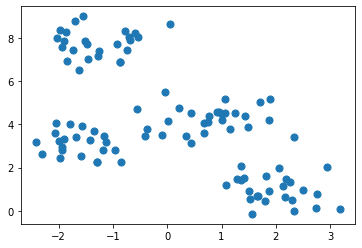

In [0]:
X,Y_true = make_blobs(n_samples=100,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [0]:
#lets work with model for k-means clustering 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 3, 2, 0, 1,
       3, 2, 0, 3, 0, 0, 2, 2, 2, 1, 2, 2, 3, 0, 1, 2, 1, 3, 0, 3, 1, 3,
       3, 1, 2, 3, 0, 0, 0, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       3, 3, 2, 0, 1, 2, 0, 1, 0, 0, 3, 3, 2, 2, 2, 1, 3, 0, 2, 3, 2, 2,
       0, 0, 0, 3, 0, 3, 3, 1, 1, 3, 1, 0], dtype=int32)

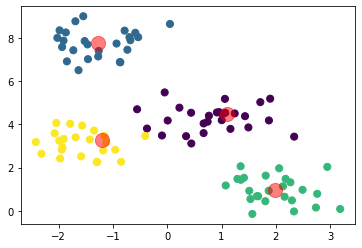

In [0]:
#lets implement trained model
from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X,n_clusters,rseed=2):
  #randomly choose clusters
  rng  = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]


  while True:
    #lets assign the labels based on the closet centers
    labels = pairwise_distances_argmin(X,centers)



    #find the new centers from the means of point 
    new_centers = np.array([X[labels==i].mean(0) for i in range(n_clusters)])

    #check for convergence
    if(np.all(centers == new_centers)):
      break;

    centers = new_centers
    return(centers,labels)  
centers,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')


#plot the centers
plt.scatter(centers[:,0],centers[:,1],c = 'red',s=200, alpha=0.50)